In [2]:
(require '[clojupyter.misc.helper :as helper])
(helper/add-dependencies '[org.scicloj/noj "2-beta4"])

{[org.apache.commons/commons-math3 "3.6.1"] nil, [scicloj/tablecloth "7.029.2"] nil, [org.tribuo/tribuo-common-tree "4.3.1"] nil, [hiccup "2.0.0-RC3"] nil, [org.apache.hadoop/hadoop-annotations "3.3.0"] nil, [com.bhauman/cljs-test-display "0.1.1"] nil, [org.iq80.snappy/snappy "0.4"] nil, [cider/piggieback "0.5.3" :exclusions [[org.clojure/clojure] [org.clojure/clojurescript] [nrepl]]] nil, [org.objenesis/objenesis "3.3"] nil, [jfree/jfreechart "1.0.12" :scope "runtime"] #{[jfree/jcommon "1.0.15" :scope "runtime"]}, [org.msgpack/msgpack "0.6.12"] #{[com.googlecode.json-simple/json-simple "1.1.1" :exclusions [[junit]]] [org.javassist/javassist "3.18.1-GA"]}, [org.scicloj/kindly-render "0.1.1-alpha"] nil, [org.scicloj/tableplot "1-beta6"] #{[org.scicloj/tempfiles "1-alpha2"]}, [org.jline/jline-builtins "3.27.1" :exclusions [[org.jline/jline-groovy]]] #{[org.jline/jline-style "3.27.1"]}, [org.jboss.xnio/xnio-nio "3.8.0.Final" :scope "runtime" :exclusions [[org.wildfly.common/wildfly-common

In [3]:
(require '[tablecloth.api :as tc]
         '[clojure.string :as str]
         '[scicloj.kindly.v4.kind :as kind]
         '[scicloj.tableplot.v1.plotly :as plotly]
         '[scicloj.tableplot.v1.hanami :as hanami]
         '[scicloj.kindly-advice.v1.api :as kindly-advice]
         '[scicloj.kindly.v4.kind :as kind]
         '[scicloj.kindly.v4.api :as kindly]
         '[clojupyter.display :as display]
         )

Register model:  :metamorph.ml/ols
Register model:  :fastmath/ols


nil

In [4]:
(defn fetch-dataset [dataset-name]
  (-> dataset-name
      (->> (format "https://vincentarelbundock.github.io/Rdatasets/csv/%s.csv"))
      (tc/dataset {:key-fn (fn [k]
                             (-> k
                                 str/lower-case
                                 (str/replace #"\." "-")
                                 keyword))})
      (tc/set-dataset-name dataset-name)))

#'user/fetch-dataset

# iris 


In [5]:
(defonce iris
  (fetch-dataset "datasets/iris"))

#'user/iris

# Supported kinds
6 kinds are suported so far:

* :kind/md 
* :kind/tex 
* :kind/vega-lite
* :kind/hiccup 
* :kind/plotly
* :kind/dataset


## :kind/dataset

In [6]:
iris

:rownames,:sepal-length,:sepal-width,:petal-length,:petal-width,:species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


## :kind/plotly

In [7]:

(-> iris
    (plotly/layer-point {:=x :sepal-width
                         :=y :sepal-length
                         :=color :species
                         :=mark-size 10})
    plotly/plot
    )

## :kind/md

In [8]:
(kind/md "**bold**")

**bold**

##  :kind/vega-lite

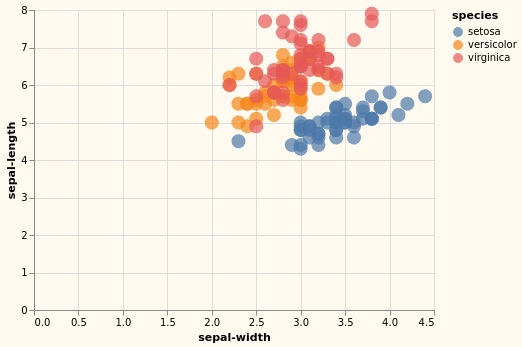

In [9]:
(-> iris
    (hanami/plot hanami/point-chart
                 {:=x :sepal-width
                  :=y :sepal-length
                  :=color :species
                  :=mark-size 200}))

## :kind/tex

In [10]:
(kind/tex "$\\sin{x}$")

## kinds can as well be on vars

In this example the "kind" is not medatadata of the value, but metadata of th var

In [15]:
(def iris-no-meta
 (with-meta
   (-> iris
    (hanami/plot hanami/point-chart
                 {:=x :sepal-width
                  :=y :sepal-length
                  :=color :species
                  :=mark-size 200}))
    {}))

#'user/iris-no-meta

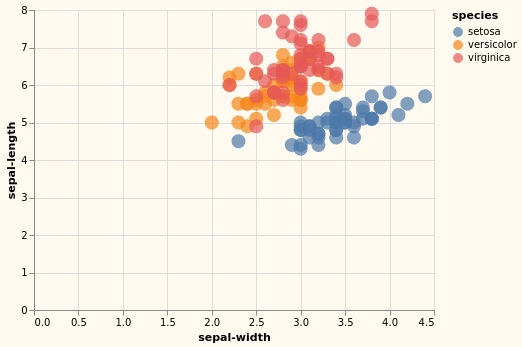

In [17]:
^kind/vega-lite iris-no-meta

In [22]:
^kind/tex ["$\\sqrt{x^2+1}$"]

In [23]:
^kind/tex ["$\\sqrt{x^2+1}$" "$\\sqrt{x^2+1}$"]